In [1]:
import open3d as o3d
import numpy as np
from visualizer import Visualizer
import matplotlib.pyplot as plt
from transformation_matrix import TransformationMatrix

if not 'vis' in locals():
    vis = Visualizer()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[[  0   0]
 [-30  30]
 [-20  20]]
x=0.0, y=22.72, z=-2.69
roll=-39.0°, pitch=35.86°, yaw=1.69°


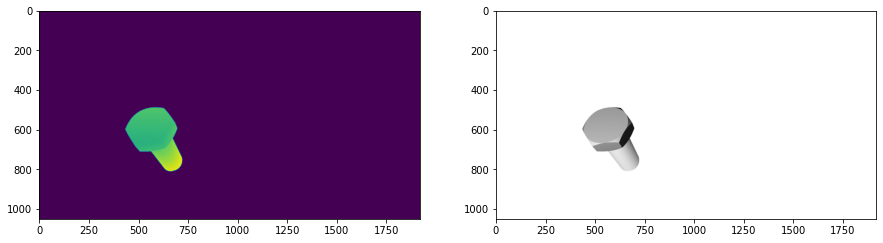

In [3]:
view = {
    "field_of_view" : 60.0,
    "front" : [ -1, 0, 0 ],
    "lookat" : [ 0, 0, 0 ],
    "up" : [ 0, 0, 1.0 ],
    "zoom" : 1
}

bolt_mesh = o3d.io.read_triangle_mesh("bolt.stl")
bolt_mesh.compute_vertex_normals()
bolt_mesh.compute_triangle_normals()

t = TransformationMatrix.make_random(40, [0, 30, 20])
print(t)
bolt_mesh.transform(t)
vis.draw_geometries([bolt_mesh], view=view, moveable=False)

depth = vis.vis.capture_depth_float_buffer(False)
image = vis.vis.capture_screen_float_buffer(False)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(np.asarray(depth))
plt.subplot(122)
plt.imshow(np.asarray(image))

In [8]:
params = vis.vis.get_view_control().convert_to_pinhole_camera_parameters()
I = params.intrinsic
E = params.extrinsic
print(TransformationMatrix(E))

x=-0.0, y=0.0, z=51.23
roll=90.0°, pitch=-90.0°, yaw=0.0°


In [5]:
# https://medium.com/yodayoda/from-depth-map-to-point-cloud-7473721d3f
pcd = o3d.geometry.PointCloud().create_from_depth_image(depth, I, E)
vis.draw_geometries([pcd])
ctl = vis.vis.get_view_control()
ctl.convert_from_pinhole_camera_parameters(params)
vis.render()